## Your Features Are Important? It Doesn’t Mean They Are Good

- https://towardsdatascience.com/your-features-are-important-it-doesnt-mean-they-are-good-ff468ae2e3d4

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

feature importance가 대부분의 경우 모델 설명력을 위해 사용되고, 이를 사용한 RFE가 피처 선택 알고리즘으로 사용되고 있다.   
그런데 피처가 중요하다는 것이 모델에 유익하다는 뜻은 아니다.

실제로 어떤 특징이 중요하다고 말할 때, 이는 단순히 그 특징이 모델의 예측에 높은 기여도를 제공한다는 의미입니다. 
**하지만 이러한 기여도가 잘못되었을 수도 있다는 점을 고려해야 합니다.**

간단한 예를 들어, 데이터 과학자가 모델 피처 중에서 실수로 고객 ID를 잊어버렸다고 가정해 보겠습니다.  
이 모델은 고객 ID를 고도의 예측 기능으로 사용합니다.  
결과적으로 이 기능은 보이지 않는 데이터에서는 잘 작동하지 않기 때문에 실제로 모델을 악화시키더라도 기능 중요도가 높을 것입니다.???

의리를 명확하게 하기 위해 두 개념을 잘 구분할 빞요가 있다.

- 예측 기여도: 예측의 어느 부분이 피처로 인한 것인지, 피처 중요도와 동일합니다.
- 오류 기여도: 예측 오류의 어느 부분이 모델에 해당 피처가 있기 때문인지 나타냅니다.

이 문서에서는 이러한 수량을 계산하는 방법과 이를 사용하여 예측 모델에 대한 귀중한 인사이트를 얻고 개선하는 방법을 살펴봅니다.

### Starting from a Toy Example

직업, 나이, 국적에 따라 사람들의 소득을 예측하는 모델을 구축했다고 가정해 보겠습니다. 이제 이 모델을 사용하여 세 사람에 대한 예측을 수행합니다.  
따라서 우리는 실측 자료, 모델 예측 및 그에 따른 오차를 갖게 됩니다:

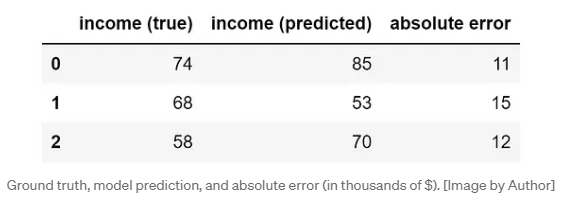

### Computing “Prediction Contribution”

예측 모델이 있으면 언제든지 모델 예측을 단일 피처가 가져온 기여도로 분해할 수 있습니다.  
이 작업은 SHAP 값을 통해 수행할 수 있습니다(SHAP 값이 어떻게 작동하는지 잘 모르신다면, 제 글을 읽어보시기 바랍니다: 누군가 설명해 주었으면 좋았을 SHAP 값에 대해 정확히 설명하기).

따라서 각 피처의 shap 밸류가 다음과 같다고 가정하자.

In [2]:
shap_values = pd.DataFrame([
  [65,  12,   8],
  [72,   3, -22],
  [78, -23,  15]], columns=["job", "age", "nationality"])
y_pred = shap_values.sum(axis=1).rename("income (predicted)")
y_true = pd.Series([74, 68, 58], name="income (true)")

Therefore, the Prediction Contribution of a feature is equal to the mean of the absolute SHAP values of that feature. If you have the SHAP values stored in a Pandas dataframe, this is as simple as:

추후 진행